In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../Resources_Tables/FINAL_opioid_data_NOSUPPRESSED.csv')
df.head()

,Unnamed: 0,Year,countycode,State,county,population,deaths,cruderate,DispenseRate,PersonalIncome,PerCapitaPersonalIncome,LessThanHS,HSDiplomaOnly,SomeCollege,BachelorOrHigher,PovertyPop,PovertyRate,UnemployedPop,UnemployedRate
0,1,2020,1003,AL,"Baldwin County, AL",229287,41,17.9,65.0,51348.0,233140.0,20635.83,62824.64,71537.54,74518.28,20189.0,8.9,6159.0,6.2
1,27,2020,1055,AL,"Etowah County, AL",102371,13,12.7,102.8,39795.0,103393.0,14127.20,34601.40,35215.62,18426.78,15650.0,15.6,3505.0,8.5
2,36,2020,1073,AL,"Jefferson County, AL",655342,227,34.6,139.0,58053.0,673341.0,58980.78,173010.29,195947.26,227403.67,92310.0,14.4,21947.0,6.9
3,44,2020,1089,AL,"Madison County, AL",379453,68,17.9,87.3,56499.0,389696.0,30356.24,72854.98,108144.11,168097.68,39100.0,10.5,9761.0,5.1
4,48,2020,1097,AL,"Mobile County, AL",412716,46,11.1,98.0,42837.0,414250.0,49938.64,141148.87,122576.65,98639.12,71398.0,17.6,16931.0,8.7


In [3]:
df.shape

(3056, 19)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3056 entries, 0 to 3055
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               3056 non-null   int64  
 1   Year                     3056 non-null   int64  
 2   countycode               3056 non-null   int64  
 3   State                    3056 non-null   object 
 4   county                   3056 non-null   object 
 5   population               3056 non-null   int64  
 6   deaths                   3056 non-null   int64  
 7   cruderate                3056 non-null   float64
 8   DispenseRate             3056 non-null   float64
 9   PersonalIncome           3056 non-null   float64
 10  PerCapitaPersonalIncome  3056 non-null   float64
 11  LessThanHS               3056 non-null   float64
 12  HSDiplomaOnly            3056 non-null   float64
 13  SomeCollege              3056 non-null   float64
 14  BachelorOrHigher        

In [5]:
##Creating summary statistics to identify top 25% crude rate
df.describe()

,Unnamed: 0,Year,countycode,population,deaths,cruderate,DispenseRate,PersonalIncome,PerCapitaPersonalIncome,LessThanHS,HSDiplomaOnly,SomeCollege,BachelorOrHigher,PovertyPop,PovertyRate,UnemployedPop,UnemployedRate
count,3056.000000,3056.000000,3056.000000,3.056000e+03,3056.000000,3056.000000,3056.000000,3056.000000,3.056000e+03,3.056000e+03,3.056000e+03,3.056000e+03,3.056000e+03,3.056000e+03,3056.000000,3056.000000,3056.000000
mean,6021.737893,2018.591623,31097.349149,3.408165e+05,62.946335,23.899794,56.842310,50788.120092,3.429600e+05,3.049779e+04,7.098837e+04,7.998881e+04,9.736087e+04,3.360060e+04,11.864758,8661.920812,5.161060
std,3701.518649,1.144309,14950.420083,6.136721e+05,105.152109,16.358298,27.044108,14422.240471,6.158122e+05,9.192114e+04,1.335366e+05,1.596732e+05,2.152512e+05,7.342898e+04,4.289997,19995.013626,2.196863
min,1.000000,2017.000000,1003.000000,1.244400e+04,10.000000,1.150000,2.000000,26433.000000,1.191500e+04,1.714000e+01,4.026000e+01,6.746000e+01,1.065400e+02,2.200000e+01,3.000000,278.000000,1.800000
25%,2529.500000,2018.000000,18084.000000,7.889125e+04,15.000000,12.600000,37.675000,41824.250000,7.983275e+04,3.630713e+03,1.147191e+04,1.015075e+04,8.531550e+03,5.272750e+03,8.800000,1805.000000,3.600000
50%,5819.000000,2019.000000,35043.000000,1.621060e+05,28.000000,20.200000,53.150000,47395.000000,1.619445e+05,9.992550e+03,3.455596e+04,3.454982e+04,3.020598e+04,1.377100e+04,11.400000,3579.500000,4.500000
75%,9266.500000,2020.000000,42077.000000,3.622722e+05,63.000000,30.900000,70.800000,55353.250000,3.626548e+05,2.494970e+04,7.290124e+04,8.297292e+04,9.349677e+04,3.447800e+04,14.400000,8308.000000,6.300000
max,12543.000000,2020.000000,56037.000000,1.016351e+07,1697.000000,165.500000,316.500000,176343.000000,1.012352e+07,2.032701e+06,2.073355e+06,2.601858e+06,3.455592e+06,1.312482e+06,32.400000,612986.000000,22.800000


In [6]:
#create box and whiskers plot for the crude rate
#plt.boxplot(df.cruderate)
#Q1 = df.cruderate.quantile(0.25)
#Q3 = df.cruderate.quantile(0.75)
#IQR = Q3 - Q1
#df = df[(df.cruderate >= Q1 - 1.5*IQR) & (df.cruderate <= Q3 + 1.5*IQR)]

In [7]:
#summary statistics for crude rate across all years and all counties
df['cruderate'].describe()

count    3056.000000
mean       23.899794
std        16.358298
min         1.150000
25%        12.600000
50%        20.200000
75%        30.900000
max       165.500000
Name: cruderate, dtype: float64

In [8]:
#create a new column which will identify "high" as 1 and "low" as 0 for cruderate. This will be used in the models
df["class"] = np.where(df["cruderate"] > 30.9, 1, 0)
df.head()

,Unnamed: 0,Year,countycode,State,county,population,deaths,cruderate,DispenseRate,PersonalIncome,PerCapitaPersonalIncome,LessThanHS,HSDiplomaOnly,SomeCollege,BachelorOrHigher,PovertyPop,PovertyRate,UnemployedPop,UnemployedRate,class
0,1,2020,1003,AL,"Baldwin County, AL",229287,41,17.9,65.0,51348.0,233140.0,20635.83,62824.64,71537.54,74518.28,20189.0,8.9,6159.0,6.2,0
1,27,2020,1055,AL,"Etowah County, AL",102371,13,12.7,102.8,39795.0,103393.0,14127.20,34601.40,35215.62,18426.78,15650.0,15.6,3505.0,8.5,0
2,36,2020,1073,AL,"Jefferson County, AL",655342,227,34.6,139.0,58053.0,673341.0,58980.78,173010.29,195947.26,227403.67,92310.0,14.4,21947.0,6.9,1
3,44,2020,1089,AL,"Madison County, AL",379453,68,17.9,87.3,56499.0,389696.0,30356.24,72854.98,108144.11,168097.68,39100.0,10.5,9761.0,5.1,0
4,48,2020,1097,AL,"Mobile County, AL",412716,46,11.1,98.0,42837.0,414250.0,49938.64,141148.87,122576.65,98639.12,71398.0,17.6,16931.0,8.7,0


C:\Users\olgao\anaconda3\envs\mlenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Year', ylabel='deaths'>

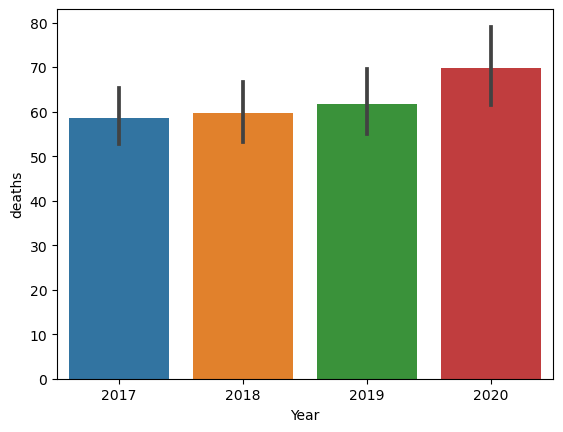

In [9]:
import seaborn as sns
sns.barplot(df["Year"], df["deaths"])

In [11]:
#logistic Regression Model
#assign X and y and split into train and test data
y = df["class"]
X = df.drop(columns=['class', 'cruderate','Unnamed: 0', 'deaths', 'Year', 'countycode', 'State', 'county', 'UnemployedPop', 'PovertyPop'])
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
   y, random_state=1, stratify=y)
X.head()

,population,DispenseRate,PersonalIncome,PerCapitaPersonalIncome,LessThanHS,HSDiplomaOnly,SomeCollege,BachelorOrHigher,PovertyRate,UnemployedRate
0,229287,65.0,51348.0,233140.0,20635.83,62824.64,71537.54,74518.28,8.9,6.2
1,102371,102.8,39795.0,103393.0,14127.20,34601.40,35215.62,18426.78,15.6,8.5
2,655342,139.0,58053.0,673341.0,58980.78,173010.29,195947.26,227403.67,14.4,6.9
3,379453,87.3,56499.0,389696.0,30356.24,72854.98,108144.11,168097.68,10.5,5.1
4,412716,98.0,42837.0,414250.0,49938.64,141148.87,122576.65,98639.12,17.6,8.7


In [12]:
#create a logistic regression model
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='lbfgs',
   max_iter=200,
   random_state=1)

In [13]:
#train the model
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=200, random_state=1)

In [14]:
#using the testing set, create predictions
y_pred = classifier.predict(X_test)

In [15]:
#accuracy score for Logistic Regression Model
from sklearn.metrics import accuracy_score
print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")

Accuracy Score: 0.7473821989528796


In [16]:
#confusion_matrix Logistic Regression
from sklearn.metrics import confusion_matrix, classification_report
matrix = confusion_matrix(y_test, y_pred)
print(matrix)

[[568   5]
 [188   3]]


In [17]:
#classification report Logistic Regression
report = classification_report(y_test, y_pred)

# Display Results of the Model: 
# Confusion Matrix
print("Confusion Matrix")
matrix_df = pd.DataFrame(
    matrix, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])
display(matrix_df)

print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")

print('Classification Report')
print(report)

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,568,5
Actual 1,188,3


Accuracy Score: 0.7473821989528796
Classification Report
              precision    recall  f1-score   support

           0       0.75      0.99      0.85       573
           1       0.38      0.02      0.03       191

    accuracy                           0.75       764
   macro avg       0.56      0.50      0.44       764
weighted avg       0.66      0.75      0.65       764



In [18]:
#SVM model
y_svm = df["class"]
X_svm = df.drop(columns=['class', 'Unnamed: 0', 'cruderate' ,'deaths', 'Year', 'countycode', 'State', 'county', 'UnemployedPop', 'PovertyPop'])
from sklearn.model_selection import train_test_split
X_svm_train, X_svm_test, y_svm_train, y_svm_test = train_test_split(X_svm,
   y_svm, random_state=1, stratify=y_svm)
X_svm_train.shape

(2292, 10)

In [19]:
#import the SVC module adn instantiate it
from sklearn import svm
model_svm = svm.SVC(kernel='rbf')



In [20]:
#train the model
model_svm.fit(X_svm_train, y_svm_train)


SVC()

In [21]:
#predictions
y_svm_pred = model_svm.predict(X_svm_test)
results_svm = pd.DataFrame({
   "Prediction": y_svm_pred,
   "Actual": y_svm_test
}).reset_index(drop=True)
results_svm.head()

,Prediction,Actual
0,0,0
1,0,1
2,0,0
3,0,0
4,0,0


In [22]:
#accuracy score
accuracy_score(y_svm_test, y_svm_pred)

0.75

In [23]:
#confusion matrix SVM
cm_svm = confusion_matrix(y_svm_test, y_svm_pred)
cm_svm

array([[573,   0],
       [191,   0]], dtype=int64)

In [24]:
#classification  report
print(classification_report(y_svm_test, y_svm_pred))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86       573
           1       0.00      0.00      0.00       191

    accuracy                           0.75       764
   macro avg       0.38      0.50      0.43       764
weighted avg       0.56      0.75      0.64       764



C:\Users\olgao\anaconda3\envs\mlenv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\olgao\anaconda3\envs\mlenv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\olgao\anaconda3\envs\mlenv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [25]:
#Display Results SVM

# Display Results of the Model: 
# Confusion Matrix
print("Confusion Matrix")
cm_svm_df = pd.DataFrame(
    cm_svm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])
display(cm_svm_df)

print(f"Accuracy Score: {accuracy_score(y_svm_test, y_svm_pred)}")

print('Classification Report')
print(classification_report(y_svm_test, y_svm_pred))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,573,0
Actual 1,191,0


Accuracy Score: 0.75
Classification Report
              precision    recall  f1-score   support

           0       0.75      1.00      0.86       573
           1       0.00      0.00      0.00       191

    accuracy                           0.75       764
   macro avg       0.38      0.50      0.43       764
weighted avg       0.56      0.75      0.64       764



C:\Users\olgao\anaconda3\envs\mlenv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\olgao\anaconda3\envs\mlenv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\olgao\anaconda3\envs\mlenv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [26]:
#DecisionTrees model
from sklearn import tree
from sklearn.preprocessing import StandardScaler


In [27]:
#prep data for the model
y_dt = df["class"]
X_dt = df.drop(columns=['class', 'Unnamed: 0', 'deaths', 'cruderate', 'Year', 'countycode', 'State', 'county', 'UnemployedRate', 'PovertyPop'])
#X_dt.shape

In [28]:
#split into test and train sets
X_dt_train, X_dt_test, y_dt_train, y_dt_test = train_test_split(X_dt, y_dt)

In [29]:
# Creating a StandardScaler instance.
scaler = StandardScaler()
# Fitting the Standard Scaler with the training data.
X_dt_scaler = scaler.fit(X_dt_train)

# Scaling the data.
X_dt_train_scaled = X_dt_scaler.transform(X_dt_train)
X_dt_test_scaled = X_dt_scaler.transform(X_dt_test)

In [30]:
# Creating the decision tree classifier instance.
model_dt = tree.DecisionTreeClassifier()
# Fitting the model.
model_dt = model_dt.fit(X_dt_train_scaled, y_dt_train)

In [31]:
# Making predictions using the testing data.
predictions = model_dt.predict(X_dt_test_scaled)

In [32]:
# Calculating the confusion matrix
cm_dt = confusion_matrix(y_dt_test, predictions)

# Create a DataFrame from the confusion matrix.
cm_dt_df = pd.DataFrame(
    cm_dt, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])

cm_dt_df

,Predicted 0,Predicted 1
Actual 0,469,100
Actual 1,79,116


In [33]:
# Calculating the accuracy score.
acc_score_dt = accuracy_score(y_dt_test, predictions)
print(acc_score_dt)

0.7657068062827225


In [34]:
# Displaying results
print("Confusion Matrix")
display(cm_dt_df)
print(f"Accuracy Score : {acc_score_dt}")
print("Classification Report")
print(classification_report(y_dt_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,469,100
Actual 1,79,116


Accuracy Score : 0.7657068062827225
Classification Report
              precision    recall  f1-score   support

           0       0.86      0.82      0.84       569
           1       0.54      0.59      0.56       195

    accuracy                           0.77       764
   macro avg       0.70      0.71      0.70       764
weighted avg       0.77      0.77      0.77       764

